<div align="center">

# Play Ground Series S3 E26

## 💉 Predicting outcomes of patients with cirrhosis 💉

### Welcome to my kaggle notebook! For this Episode of the Series, is to use a multi-class approach to predict the the outcomes of patients with cirrhosis.

</div>

## Goal: For this Episode of the Series, is to use a multi-class approach to predict the the outcomes of patients with cirrhosis

In [54]:
# Standard library imports
import pandas as pd
import numpy as np
import seaborn as sns
import ydata_profiling as pp

# Plotting libraries
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# ML imports

In [53]:
df_train = pd.read_csv(r"..\data\train.csv")
df_test = pd.read_csv(r"..\data\test.csv")

In [ ]:
pp.ProfileReport(df_train)

In [60]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("______________________")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("DataFrame Head:")
    print("______________________")
    display(df.head())
    print("\n")

    print("DataFrame Tail:")
    print("______________________")
    display(df.tail())
    print("\n")

    print("DataFrame Description:")
    print("______________________")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("______________________")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("______________________")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("______________________")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("______________________")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

analyze_dataframe(df_train)

DataFrame Information:
______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothr

None



DataFrame Head:
______________________


id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C



DataFrame Tail:
______________________


id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
7900  7900    1166  D-penicillamine  16839   F       N            N       N   
7901  7901    1492          Placebo  17031   F       N            Y       N   
7902  7902    1576  D-penicillamine  25873   F       N            N       Y   
7903  7903    3584  D-penicillamine  22960   M       N            Y       N   
7904  7904    1978  D-penicillamine  19237   F       N            N       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
7900     N        0.8        309.0     3.56    38.0    1629.0   79.05   
7901     N        0.9        260.0     3.43    62.0    1440.0  142.00   
7902     S        2.0        225.0     3.19    51.0     933.0   69.75   
7903     N        0.7        248.0     2.75    32.0    1003.0   57.35   
7904     N        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage Status  
7900          224.0      344.0          9.9    2.0      C  
7901           78.0      277.0         10.0    4.0      C  
7902           62.0      200.0         12.7    2.0      D  
7903          118.0      221.0         10.6    4.0      D  
7904           85.0      336.0         10.3    3.0      C



DataFrame Description:
______________________


count          mean          std      min       25%       50%  \
id             7905.0   3952.000000  2282.121272     0.00   1976.00   3952.00   
N_Days         7905.0   2030.173308  1094.233744    41.00   1230.00   1831.00   
Age            7905.0  18373.146490  3679.958739  9598.00  15574.00  18713.00   
Bilirubin      7905.0      2.594485     3.812960     0.30      0.70      1.10   
Cholesterol    7905.0    350.561923   195.379344   120.00    248.00    298.00   
Albumin        7905.0      3.548323     0.346171     1.96      3.35      3.58   
Copper         7905.0     83.902846    75.899266     4.00     39.00     63.00   
Alk_Phos       7905.0   1816.745250  1903.750657   289.00    834.00   1181.00   
SGOT           7905.0    114.604602    48.790945    26.35     75.95    108.50   
Tryglicerides  7905.0    115.340164    52.530402    33.00     84.00    104.00   
Platelets      7905.0    265.228969    87.465579    62.00    211.00    265.00   
Prothrombin    7905.0     10.629462     0.781735     9.00     10.00     10.60   
Stage          7905.0      3.032511     0.866511     1.00      2.00      3.00   

                    75%       max  
id              5928.00   7904.00  
N_Days          2689.00   4795.00  
Age            20684.00  28650.00  
Bilirubin          3.00     28.00  
Cholesterol      390.00   1775.00  
Albumin            3.77      4.64  
Copper           102.00    588.00  
Alk_Phos        1857.00  13862.40  
SGOT             137.95    457.25  
Tryglicerides    139.00    598.00  
Platelets        316.00    563.00  
Prothrombin       11.00     18.00  
Stage              4.00      4.00



Number of Null Values:
______________________


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64



Number of Duplicated Rows:
______________________


0



Number of Unique Values:
______________________


id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64



DataFrame Shape:
______________________
Rows: 7905, Columns: 20


## Data points interpretation
___
1. **Ascites**: Ascites is a medical term for an abnormal fluid buildup in the abdominal cavity, specifically in the peritoneal space. This syndrome is frequently caused by underlying health conditions such as liver disease, cirrhosis, heart failure, cancer, or infections.

2. **Hepatomegaly**: Hepatomegaly refers to an enlargement of the liver. It is a non-specific medical sign, having many causes, which can broadly be broken down into infection, hepatic tumors, and metabolic disorder.

3. **Spiders**: In medical terms, 'spiders' could refer to spider angiomas (also known as spider nevi), which are common skin lesions consisting of central arterioles surrounded by many smaller vessels due to high estrogen levels and may occur in any condition with high estrogen states such as cirrhosis.

4. **Edema**: Edema is swelling caused by fluid trapped in your body’s tissues, most often in your feet, ankles, and legs. Your healthcare provider will test your edema by pressing their finger into the swollen area (pitting) to identify how much fluid is in your tissues (grade).

5. **Bilirubin**: Bilirubin is a reddish-yellow water-insoluble pigment that is formed by the breakdown of heme, is excreted in a water-soluble form by liver cells into bile, and occurs in blood and urine especially in diseased states.

6. **Cholesterol**: Cholesterol is a waxy, fat-like substance that's found in all the cells in your body. Your body needs some cholesterol to make hormones, vitamin D, and substances that help you digest foods.

7. **Albumin**: Albumin is a type of protein that is found in your blood. It's produced by your liver and serves several important functions in the body. One of its main roles is to help maintain the right amount of water in your blood and tissues.

8. **Copper**: Copper, an essential mineral, is naturally present in some foods and is available as a dietary supplement. It is a cofactor for several enzymes (known as cuproenzymes) involved in energy production, iron metabolism, 
neuropeptide activation, connective tissue synthesis, and neurotransmitter synthesis.

9. **Alk_Phos**: Alkaline phosphatase (ALP) is an enzyme that’s found throughout your body. An enzyme is a type of protein in a cell that acts as a catalyst and allows certain bodily processes to happen.

10. **SGOT**: Serum glutamic oxaloacetic transaminase (SGOT), also known as aspartate aminotransferase (AST), is an enzyme that is normally present in liver and heart cells. SGOT is released into blood when the liver or heart is damaged.

## Possible interactions of the data points
___
1. **Bilirubin and Albumin**: These are both liver function tests. Bilirubin levels can increase due to liver dysfunction, while albumin levels can decrease. Their interaction might be indicative of the severity of liver disease.

2. **Ascites and Edema with Albumin**: Ascites and edema are clinical signs of advanced liver disease and can be influenced by the level of albumin, as it plays a crucial role in maintaining oncotic pressure in the blood vessels.

3. **Alkaline Phosphatase (Alk_Phos) and Bilirubin**: Both are markers of liver function. Elevated levels can indicate cholestasis or blockage of bile flow, often seen in liver diseases.

4. **SGOT and Bilirubin**: SGOT is an enzyme that can be elevated in liver damage. Together with bilirubin, these levels can indicate the extent of liver injury.

5. **Platelets and Prothrombin**: Both are involved in blood clotting. Liver disease can lead to thrombocytopenia (low platelet count) and prolonged prothrombin time, reflecting impaired liver synthesis function.

6. **Cholesterol and Triglycerides**: These are both lipids, and their interaction can be relevant in understanding the overall lipid profile, which is important in the context of cardiovascular risk and metabolic health.

7. **Drug (D-penicillamine) with Liver Function Tests**: The interaction between the use of D-penicillamine and liver function tests like Bilirubin, Albumin, Alk Phos might be insightful, especially in patients with Wilson’s Disease or liver involvement in Rheumatoid Arthritis.

8. **Age with Various Biomarkers**: Age might modulate the relationship between various biomarkers (like Bilirubin, Albumin, SGOT) and clinical outcomes.



c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seabor

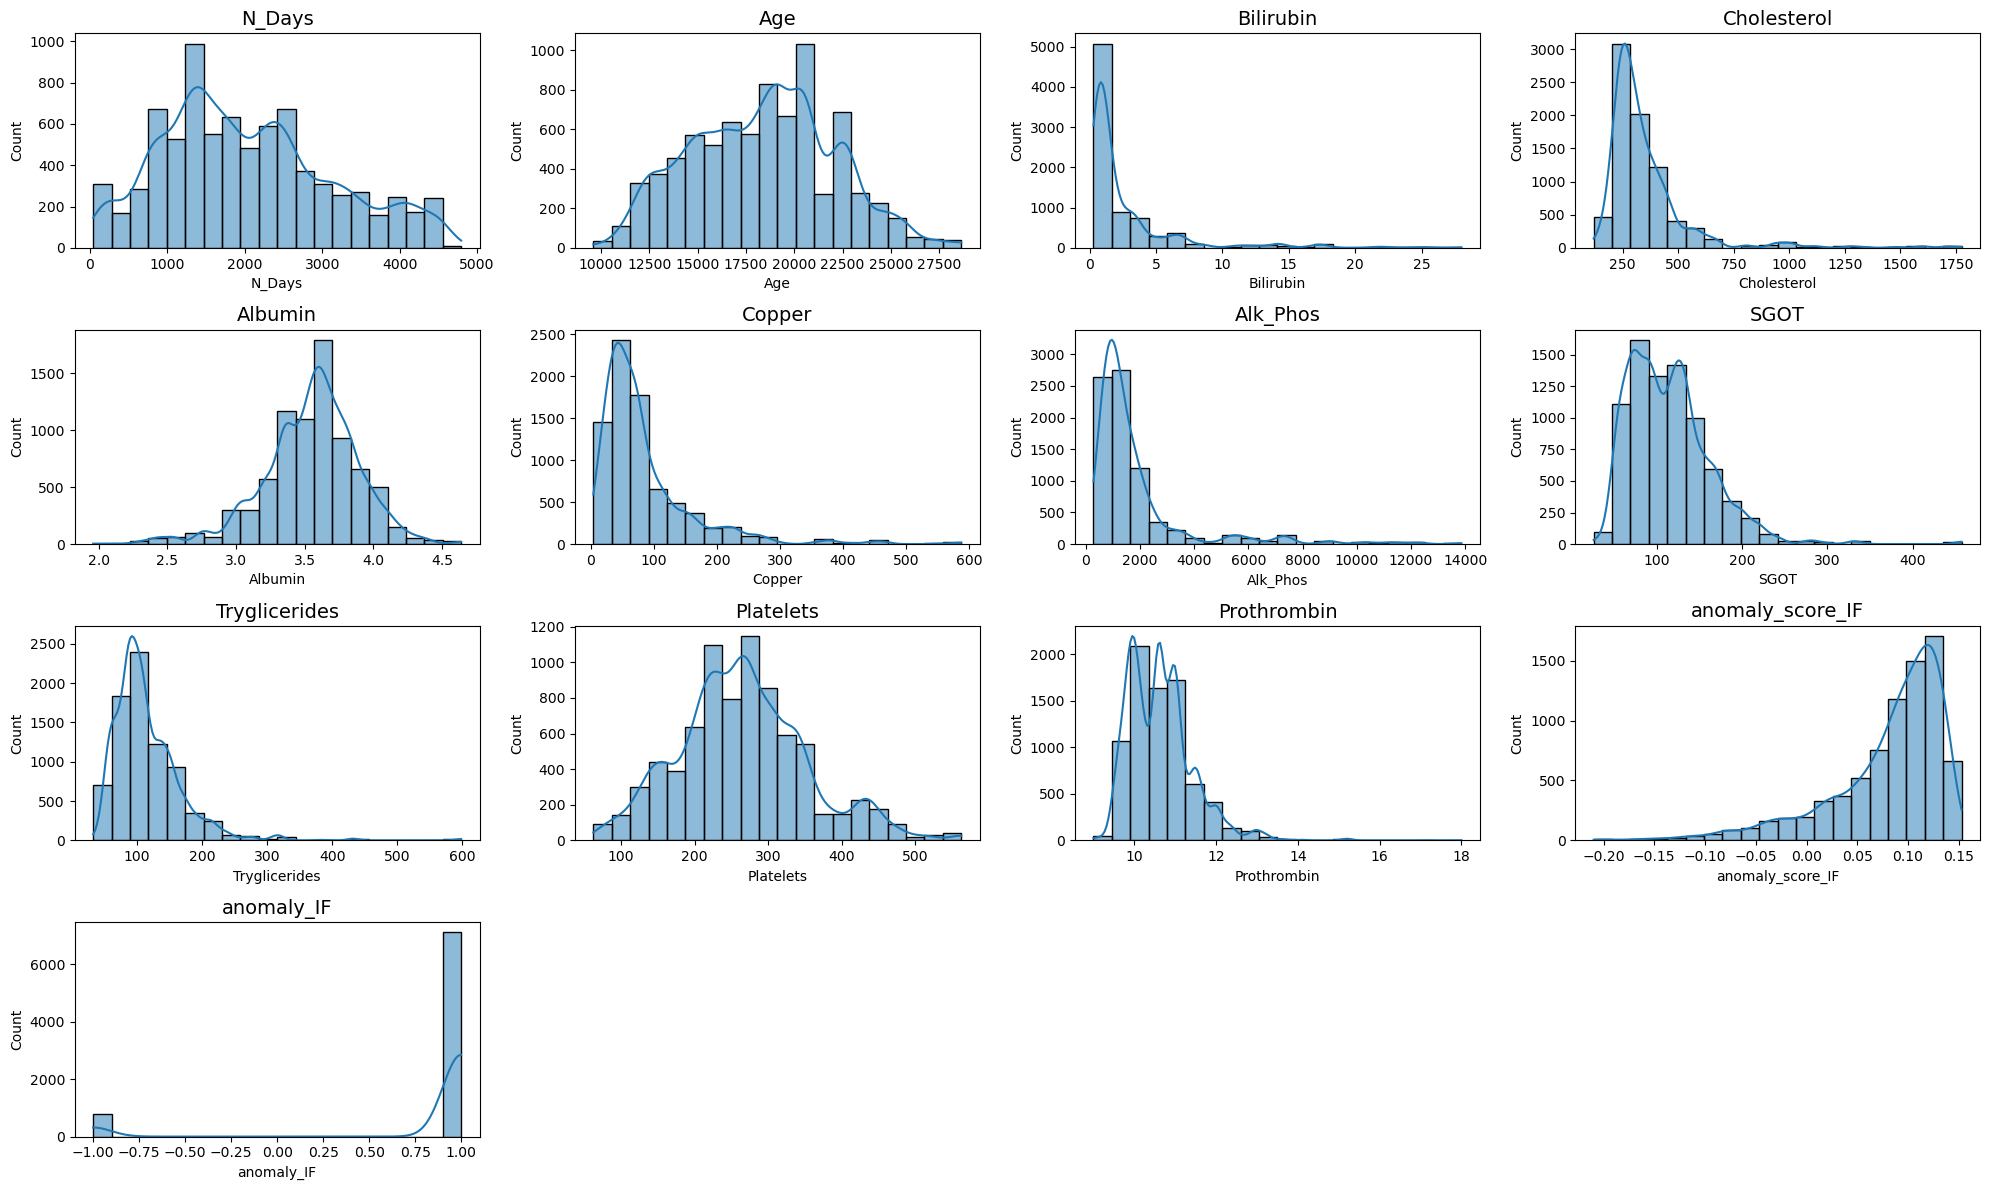

In [145]:
def prelim_eda_histplot(df):
    """
    Create a histogram plot of each column in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    columns_to_plot = df.drop(['id','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage','Status'], axis=1)      


    num_columns = len(columns_to_plot.columns)
    num_rows = (num_columns - 1) // 4 + 1  # Calculate the number of rows based on the number of columns
    num_cols = min(num_columns, 4)  # Set the number of columns to 4 or the number of columns in the DataFrame, whichever is smaller
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))  # Adjust the figsize as needed

    # Loop over selected columns and create histogram plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(data=df, x=column, ax=axes[row, col], kde=True, bins=20)
        axes[row, col].set_title(f'{column}', fontsize=14)
        axes[row, col].set_aspect('auto')

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

prelim_eda_histplot(df_train)

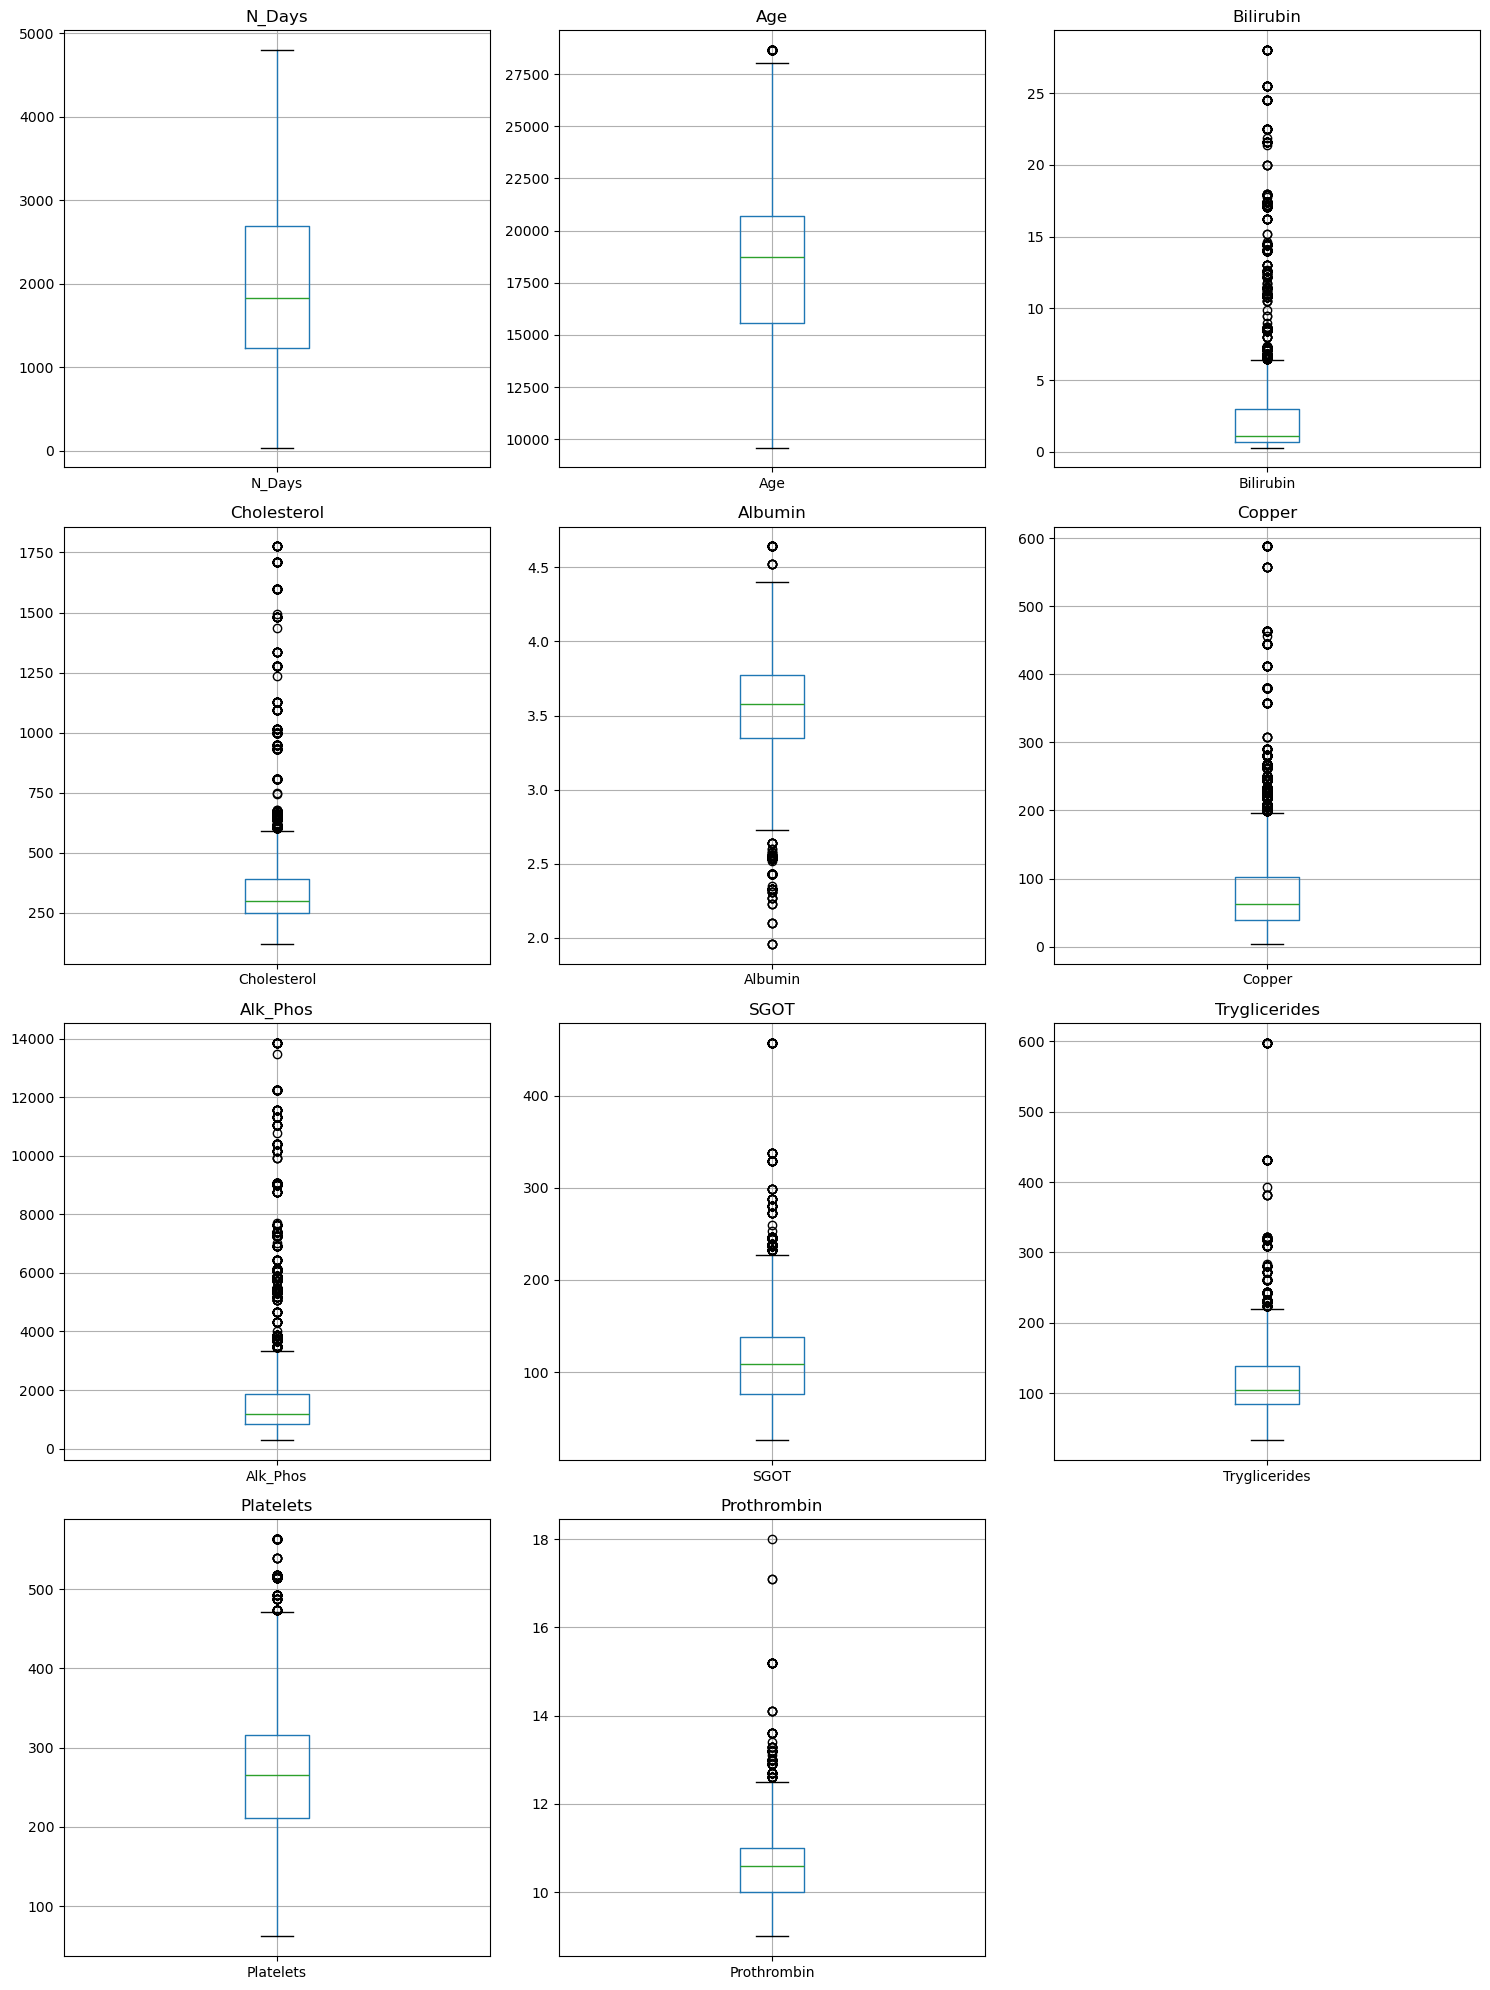

In [24]:

def create_boxplots(df, exclude_columns):
    """
    Create a series of boxplot subplots for the given DataFrame, excluding specified columns.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    exclude_columns (list): List of column names to exclude from plotting.

    Returns:
    matplotlib.figure.Figure: The figure object containing the subplots.
    """
    # Dropping the specified columns
    df_to_plot = df.drop(exclude_columns, axis=1)
    num_cols = len(df_to_plot.columns)
    
    # Determining the layout of the subplot grid
    cols_per_row = 3
    rows = (num_cols + cols_per_row - 1) // cols_per_row

    # Creating the subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten in case of a single row

    for i, col in enumerate(df_to_plot.columns):
        df_to_plot.boxplot(column=col, ax=axes[i])
        axes[i].set_title(col)

    # Hide unused subplots
    for j in range(i + 1, rows * cols_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    return fig

# Columns to exclude from the plot
exclude_columns = ['id', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']

# Creating the boxplot subplots
fig = create_boxplots(df_train, exclude_columns)
plt.show()


In [141]:
normal_ranges = {
    "Bilirubin": (0.3, 1.2),
    "Cholesterol": (0, 200),
    "Albumin": (3.4, 5.4),
    "Copper": (70, 140),
    "Alk_Phos": (44, 147),
    "SGOT": (10, 40),
    "Tryglicerides": (0, 150),
    "Platelets": (150, 450),
    "Prothrombin": (9.5, 13.5)
}

columns_to_plot = [
    "Bilirubin",
    "Cholesterol",
    "Albumin",
    "Copper",
    "Alk_Phos",
    "SGOT",
    "Tryglicerides",
    "Platelets",
    "Prothrombin"
]

In [144]:

def create_boxplot_subplots(df, columns_to_plot, normal_ranges):
    """
    Create a subplot of box plots for the specified columns in the given DataFrame,
    including horizontal lines for normal ranges and corresponding legend entries.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns_to_plot (list): List of column names to plot.
    normal_ranges (dict): Dictionary of the form {column_name: (lower, upper)} representing normal ranges.

    Returns:
    None
    """
    fig = make_subplots(rows=3, cols=3, subplot_titles=columns_to_plot)

    # Add a box plot to each subplot cell and normal range lines
    for i, column in enumerate(columns_to_plot, start=1):
        row = (i - 1) // 3 + 1
        col = (i - 1) % 3 + 1
        fig.add_trace(go.Box(y=df[column], name=column), row=row, col=col)
        
        # Add normal range lines if available
        if column in normal_ranges:
            lower, upper = normal_ranges[column]
            # Lower normal range line
            fig.add_shape(type='line',
                          xref='x' + str(i), yref='y' + str(i),
                          x0=0, x1=1, y0=lower, y1=lower,
                          line=dict(color='green', width=2),
                          row=row, col=col)
            # Upper normal range line
            fig.add_shape(type='line',
                          xref='x' + str(i), yref='y' + str(i),
                          x0=0, x1=1, y0=upper, y1=upper,
                          line=dict(color='red', width=2),
                          row=row, col=col)
    
    # Add invisible traces for legend entries
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                             line=dict(color='green', width=2), name='Lower Normal Limit'))
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines',
                             line=dict(color='red', width=2), name='Upper Normal Limit'))

    fig.update_layout(
        height=1000,
        width=1000,
        title_text="Laboratory Measurements Distribution",
        font_size=14,
        title_x=0.5
    )

    fig.show()
create_boxplot_subplots(df_train, columns_to_plot, normal_ranges)

In [ ]:
def create_heatmap(df, figsize=(10, 8), annot=True, cmap='coolwarm',fmt='.1f'):
    """
    Create a heatmap for the correlation matrix of the numeric columns in the given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    figsize (tuple): Size of the heatmap.
    annot (bool): If True, write the data value in each cell.
    cmap (str): Colormap used for the heatmap.

    Returns:
    matplotlib.figure.Figure: The figure object containing the heatmap.
    """
    plt.figure(figsize=figsize)

    # Select only numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()

    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=fmt)
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

# Example usage
create_heatmap(df_train)

## Outlier Detection
____
### normal ranges for data points
1. **Bilirubin**: 
   - Normal range for total bilirubin is typically 0.3 to 1.2 mg/dL.

2. **Cholesterol**:
   - Total cholesterol: Less than 200 mg/dL is considered desirable.

3. **Albumin**:
   - Normal range is approximately 3.4 to 5.4 g/dL.

4. **Copper**:
   - Serum copper levels are usually 70 to 140 µg/dL.

5. **Alk_Phos** (Alkaline Phosphatase):
   - Normal range is typically 44 to 147 IU/L.

6. **SGOT** (AST):
   - Normal range is typically 10 to 40 IU/L.

7. **Triglycerides**:
   - Normal range is less than 150 mg/dL.

8. **Platelets**:
   - Normal range is typically 150,000 to 450,000 platelets per microliter of blood.

9. **Prothrombin Time**:
   - Normal range is usually around 9.5 to 13.5 seconds.


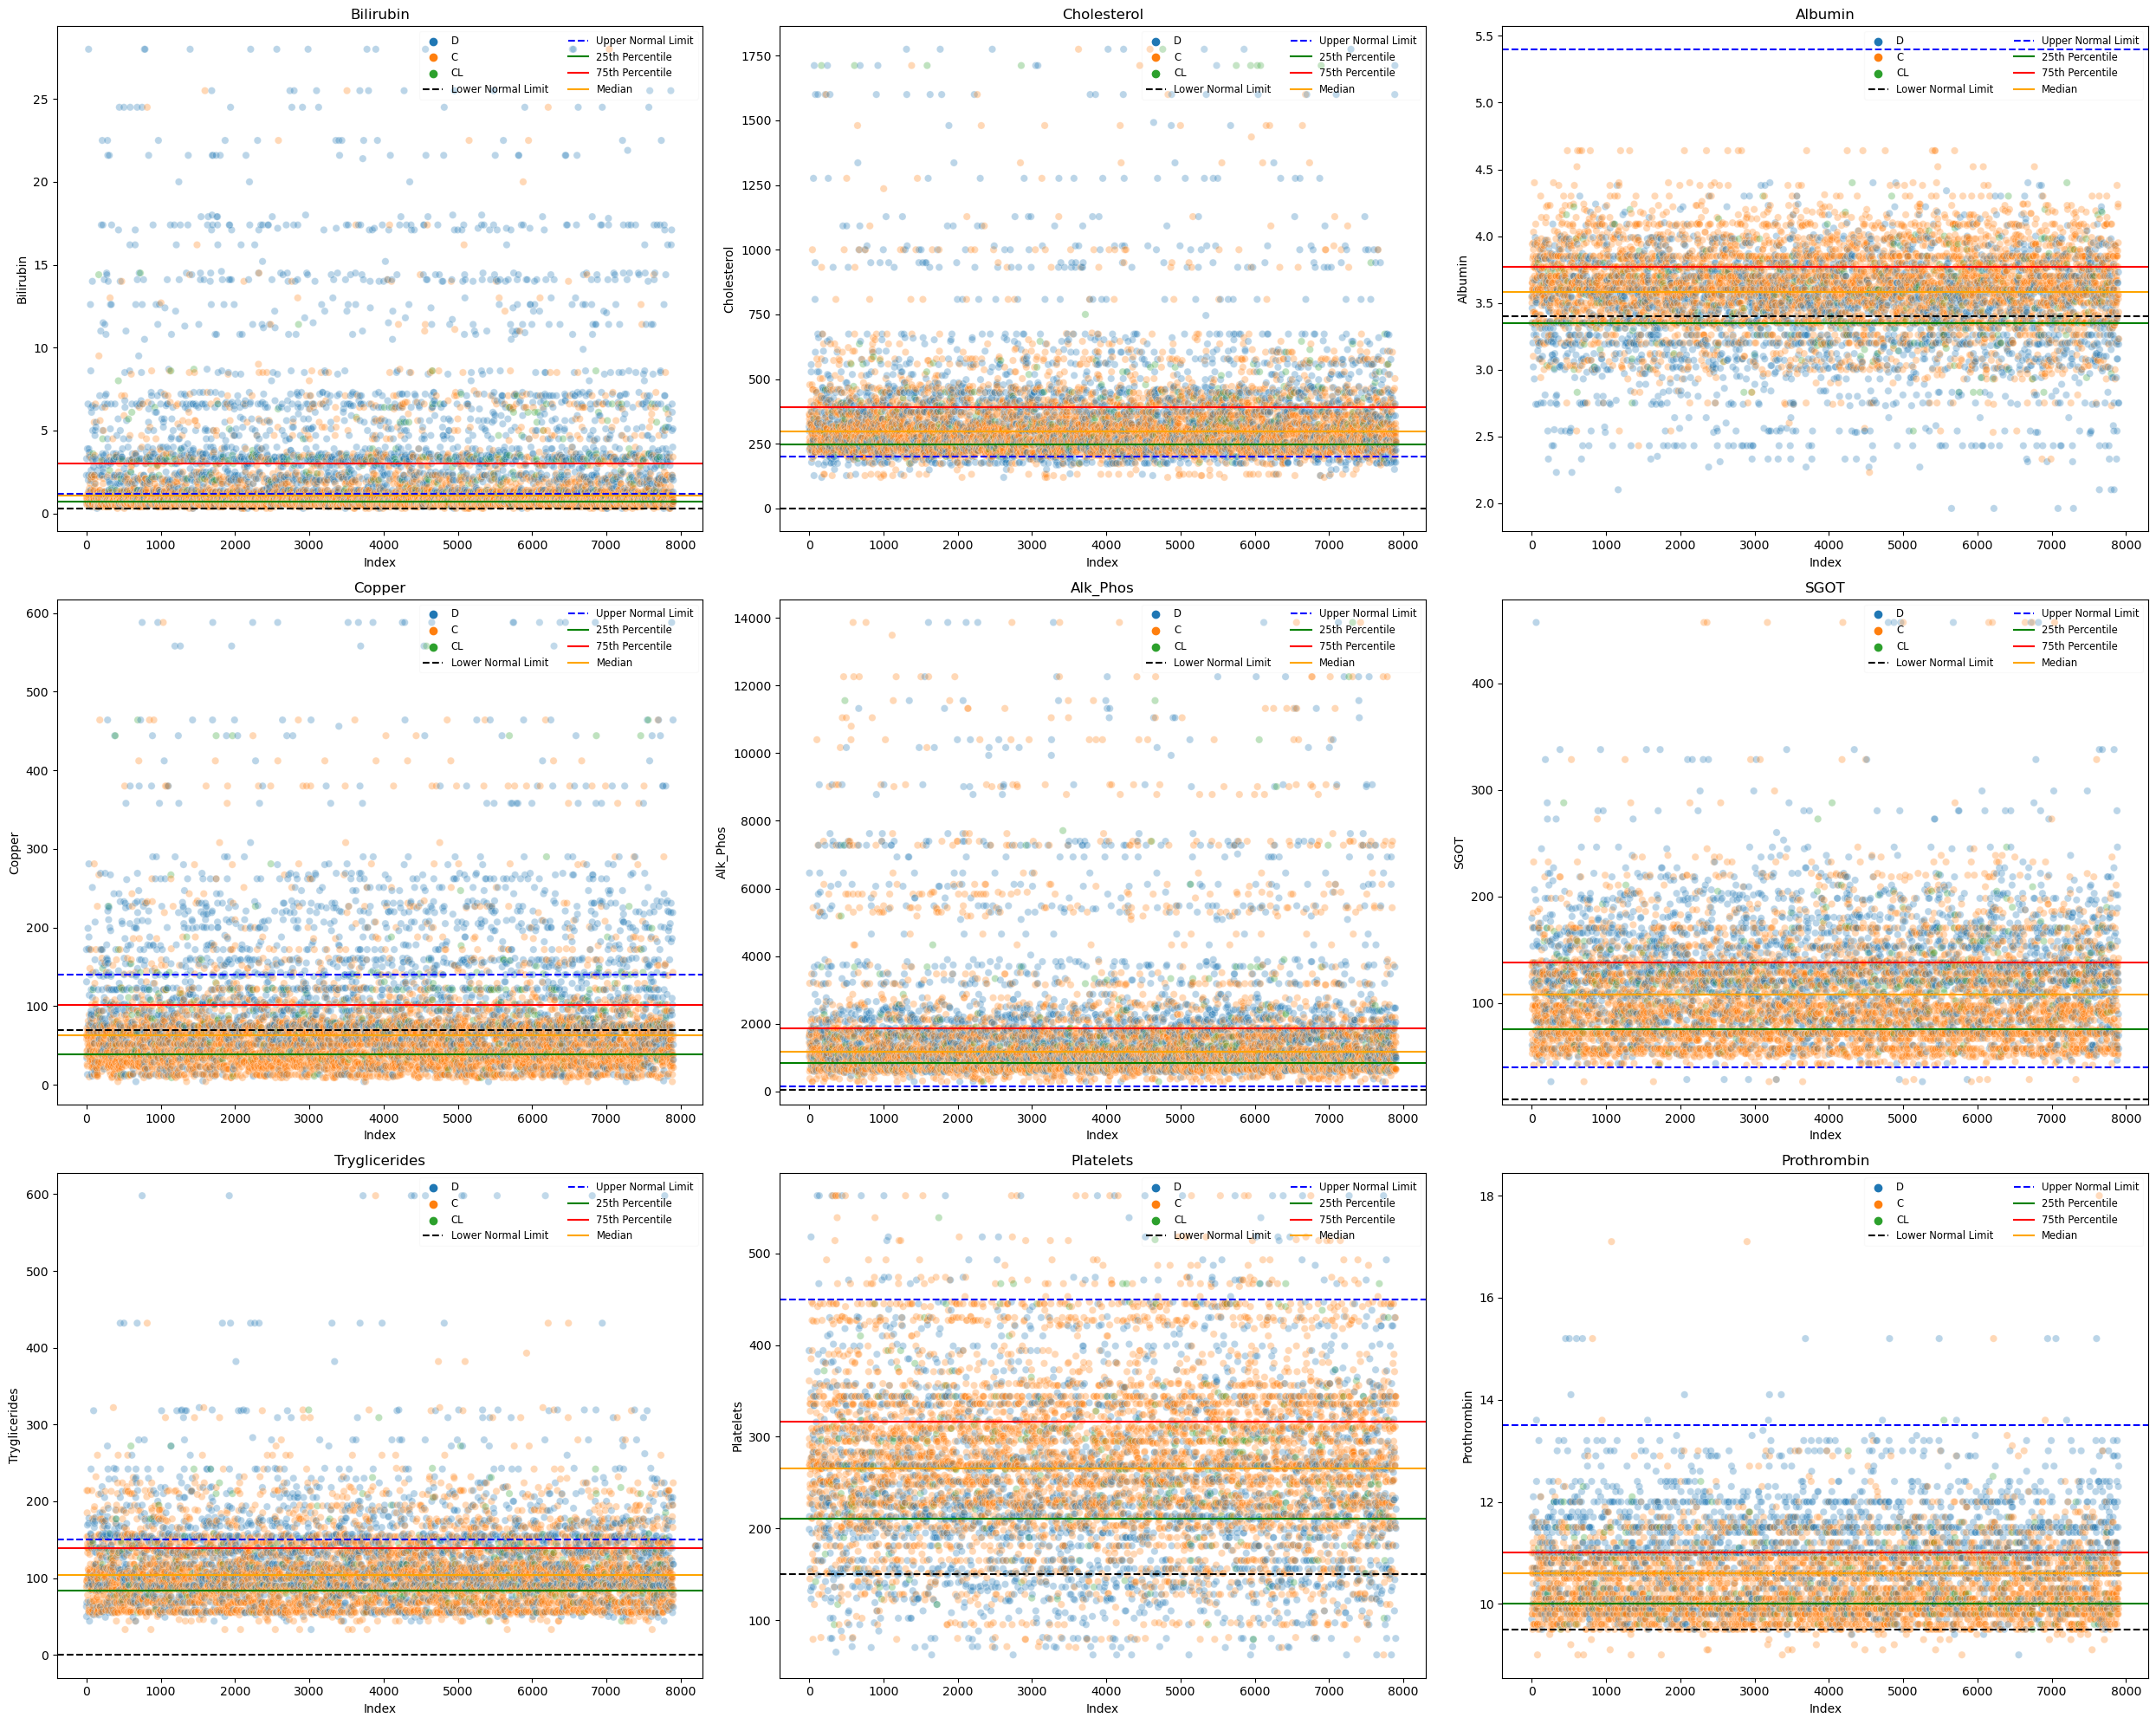

In [138]:
# Define the normal ranges for each test

normal_ranges = {
    "Bilirubin": (0.3, 1.2),
    "Cholesterol": (0, 200),
    "Albumin": (3.4, 5.4),
    "Copper": (70, 140),
    "Alk_Phos": (44, 147),
    "SGOT": (10, 40),
    "Tryglicerides": (0, 150),
    "Platelets": (150, 450),
    "Prothrombin": (9.5, 13.5)
}

# Create scatter plots
plt.figure(figsize=(25, 20))
for i, (test, range_vals) in enumerate(normal_ranges.items(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=range(len(df_train)), y=df_train[test], hue=df_train['Status'], alpha=0.3)

    # Normal range lines
    plt.axhline(y=range_vals[0], color='black', linestyle='--', label='Lower Normal Limit')
    plt.axhline(y=range_vals[1], color='blue', linestyle='--', label='Upper Normal Limit')

    # Quantile range lines (25th and 75th percentiles)
    lower_quantile = df_train[test].quantile(0.25)
    upper_quantile = df_train[test].quantile(0.75)
    plt.axhline(y=lower_quantile, color='green', linestyle='-', label='25th Percentile')
    plt.axhline(y=upper_quantile, color='red', linestyle='-', label='75th Percentile')

    # Median line
    median = df_train[test].median()
    plt.axhline(y=median, color='orange', linestyle='-', label='Median')


    plt.title(test)
    plt.xlabel("Index")
    plt.ylabel(test)
    plt.legend(loc='upper right', fontsize='small', ncol=2, framealpha=0.1)

plt.tight_layout()
plt.show()

In [ ]:
# Create a subplot grid with Plotly, 3x3 for the example
fig = make_subplots(rows=3, cols=3, subplot_titles=list(normal_ranges.keys()))

# Loop over your normal_ranges to create scatter plots and lines
for i, (test, range_vals) in enumerate(normal_ranges.items(), start=1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1

    # Add scatter plot
    fig.add_trace(
        go.Scatter(
            x=df_train.index, 
            y=df_train[test], 
            mode='markers', 
            name=test,
            marker=dict(opacity=0.3),
            legendgroup='scatter',  # Same group for all scatter plots
            showlegend=(i == 1)  # Only show legend for the first plot
        ),
        row=row, col=col
    )

    # Add normal range and quantile lines without adding to legend again
    fig.add_hline(y=range_vals[0], line_dash='solid', line_color='black', row=row, col=col)
    fig.add_hline(y=range_vals[1], line_dash='solid', line_color='blue', row=row, col=col)
    lower_quantile = df_train[test].quantile(0.25)
    upper_quantile = df_train[test].quantile(0.75)
    fig.add_hline(y=lower_quantile, line_dash='solid', line_color='orange', row=row, col=col)
    fig.add_hline(y=upper_quantile, line_dash='solid', line_color='red', row=row, col=col)

# Add invisible traces for the legend for lines
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color='black', dash='solid'),
    legendgroup='lines',  # Same group for all lines
    showlegend=True, name='Lower Normal Limit'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color='blue', dash='solid'),
    legendgroup='lines',
    showlegend=True, name='Upper Normal Limit'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color='orange', dash='solid'),
    legendgroup='lines',
    showlegend=True, name='25th Percentile'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color='red', dash='solid'),
    legendgroup='lines',
    showlegend=True, name='75th Percentile'
))

# Update layout to adjust the size and title
fig.update_layout(
    height=900, 
    width=1200, 
    title_text="Laboratory Measurements Distribution", 
    title_x=0.5,
    legend_traceorder='reversed'
)

# Show the figure
fig.show()

In [139]:
# Assuming df_train is your DataFrame and normal_ranges is your dictionary of ranges

# Create a single scatter plot for demonstration
lower_normal_color = 'black'
upper_normal_color = 'black'
lower_normal_dash = 'dash'
quantile_25_color = 'blue'
quantile_75_color = 'green'
quantile_75_dash = 'solid'
line_width = 2

test = 'Platelets'
lower_limit = normal_ranges[test][0]
upper_limit = normal_ranges[test][1]
fig = px.scatter(df_train, x=df_train.index, y=test, title=test, opacity=0.6,color='Status')

# Add horizontal lines for normal range and quantiles using variables
fig.add_hline(y=lower_limit, line_dash='solid', line_color=lower_normal_color, line_width=line_width)
fig.add_hline(y=upper_limit, line_dash=lower_normal_dash, line_color=upper_normal_color, line_width=line_width)
fig.add_hline(y=lower_quantile, line_dash='solid', line_color=quantile_25_color, line_width=line_width)
fig.add_hline(y=upper_quantile, line_dash=quantile_75_dash, line_color=quantile_75_color, line_width=line_width)

# Add invisible traces for the line legend using variables
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines', 
    line=dict(color=lower_normal_color, dash='solid', width=line_width), 
    name='Lower Normal Limit'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines', 
    line=dict(color=upper_normal_color, dash='solid', width=line_width), 
    name='Upper Normal Limit'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines',
    line=dict(color=quantile_25_color, dash='solid', width=line_width), 
    name='25th Percentile'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None], mode='lines', 
    line=dict(color=quantile_75_color, dash=quantile_75_dash, width=line_width), 
    name='75th Percentile'
))

# Update y-axis range to add a 10% margin on top
y_max = df_train[test].max()
y_margin = y_max * 0.1
fig.update_yaxes(range=[0, y_max + y_margin])

# Show the figure
fig.show()

In [ ]:
for test, (lower_limit, upper_limit) in normal_ranges.items():
    fig = px.scatter(df_train, x=df_train.index, y=test, title=test, opacity=0.6)

    # Add normal range and quantile lines
    fig.add_hline(y=lower_limit, line_color='green', annotation_text='Lower Normal Limit')
    fig.add_hline(y=upper_limit, line_color='red', annotation_text='Upper Normal Limit')
    
    lower_quantile = df_train[test].quantile(0.25)
    upper_quantile = df_train[test].quantile(0.75)
    fig.add_hline(y=lower_quantile, line_color='blue', annotation_text='25th Percentile')
    fig.add_hline(y=upper_quantile, line_color='purple', annotation_text='75th Percentile')

    # Update y-axis range to add a 10% margin on top
    y_max = df_train[test].max()
    y_margin = y_max * 0.1
    fig.update_yaxes(range=[0, y_max + y_margin])
    
    fig.show()

In [62]:
from sklearn.ensemble import IsolationForest
anomaly_columns = [
    "Bilirubin",
    "Cholesterol",
    "Albumin",
    "Copper",
    "Alk_Phos",
    "SGOT",
    "Tryglicerides",
    "Platelets",
    "Prothrombin"
]

model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model_IF.fit(df_train[anomaly_columns])
df_train['anomaly_score_IF'] = model_IF.decision_function(df_train[anomaly_columns])
df_train['anomaly_IF'] = model_IF.predict(df_train[anomaly_columns])

In [66]:
def outlier_stats(data):
    """
    Calculate the number of outliers and the percentage of outliers in a given dataset.

    Parameters:
    data (pandas.Series): The input data.

    Returns:
    tuple: A tuple containing the number of outliers and the percentage of outliers.
    """
    # Calculate the number of outliers
    num_outliers = len(data[data == -1])
    print(f"Number of outliers: {num_outliers}")

    # Calculate the percentage of outliers
    percent_outliers = num_outliers / len(data) * 100
    print(f"Percentage of outliers: {percent_outliers:.2f}%")

    return num_outliers, percent_outliers

In [67]:
outlier_stats(df_train['anomaly_IF'])

Number of outliers: 791
Percentage of outliers: 10.01%


(791, 10.006325110689437)

In [45]:
def outlier_plot(data, outlier_method, x_var, y_var, x_axis_limits=[0,1], y_axis_limits=[0,1]):
    print(f'Outlier Method: {outlier_method}')
    method = f'{outlier_method}_anomaly'
    print(f'Number of outliers: {len(data[data["anomaly_IF"] == -1])}')
    print(f'Number of inliers: {len(data[data["anomaly_IF"] == 1])}')
    print(f'Number of total points: {len(data)}')
    print(f'Percentage of outliers: {len(data[data["anomaly_IF"] == -1])/len(data)}')
    print('\n')
    
    g = sns.FacetGrid(data, col='anomaly_IF', height=5, hue='anomaly_IF', hue_order=[-1,1])
    g.map(sns.scatterplot, x=x_var, y=y_var)
    g.fig.suptitle(f'Outlier Detection using {outlier_method}', y=1.10, fontweight='bold', fontsize=16)
    g.set(xlim=x_axis_limits, ylim=y_axis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f'Outliers\n{len(data[data["anomaly_IF"] == -1])} points', fontsize=16)
    axes[1].set_title(f'Inliers\n{len(data[data["anomaly_IF"] == 1])} points', fontsize=16)

    return g

In [46]:
outlier_plot(df_train, 'IF', 'Bilirubin', 'Cholesterol', [-1, 30],[-1, 220])

ValueError: Column IF_anomaly does not exist in dataframe.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\brandon\anaconda3\envs\kaggleS3E26\lib\site-packages\seabor

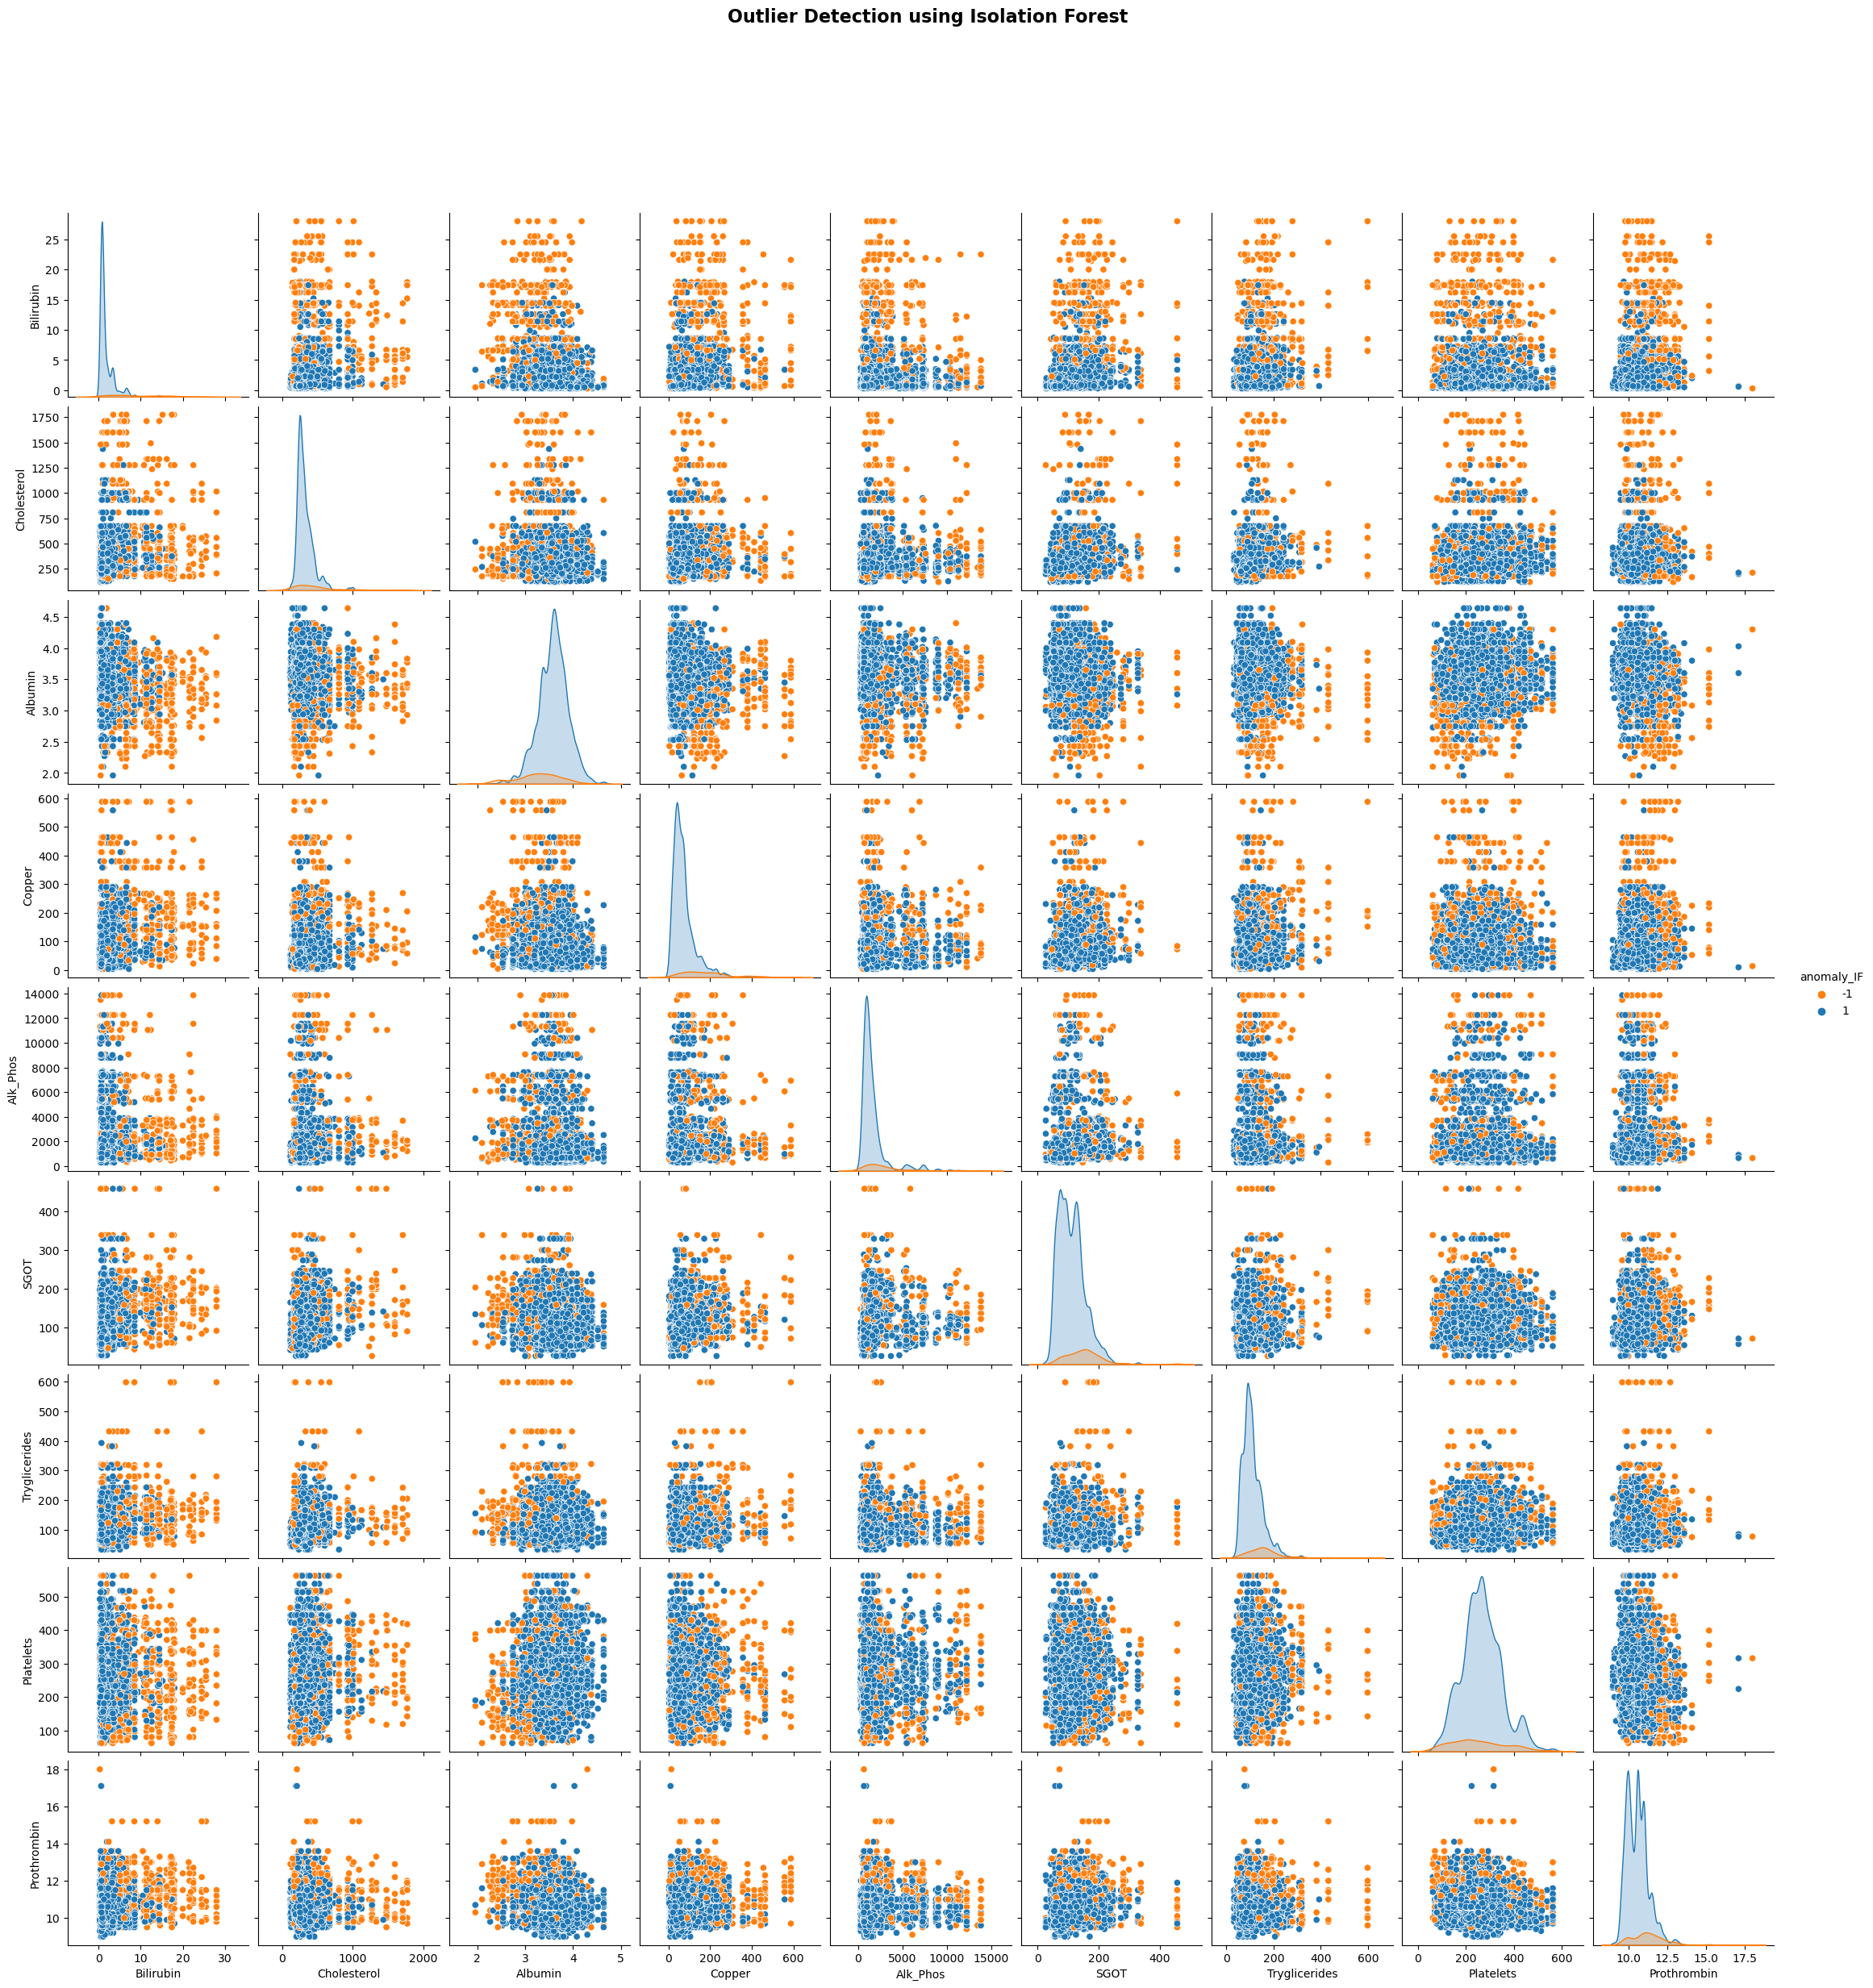

In [52]:
palette = sns.color_palette(['#ff7f0e','#1f77b4'])

sns.pairplot(df_train, vars=anomaly_columns, hue='anomaly_IF', palette=palette)
plt.suptitle('Outlier Detection using Isolation Forest', y=1.1, fontweight='bold', fontsize=16)
plt.show()

# Feature Engineering: Converting Age from days to years and creating interaction features  and liver health indicators
___

In [ ]:
def convert_age_and_create_interactions(df):
    """
    Convert 'Age' from days to years and create interaction features.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.

    Returns:
    pandas.DataFrame: The modified DataFrame.
    """
    # Feature Engineering: Categorical Variable Interactions and Grouped Categorical Variables

    # Creating interaction features for categorical variables
    df['Ascites_Edema'] = df['Ascites'] + "_" + df['Edema']
    df['Ascites_Spiders'] = df['Ascites'] + "_" + df['Spiders']
    df['Hepatomegaly_Spiders'] = df['Hepatomegaly'] + "_" + df['Spiders']

    # Creating grouped categorical variables based on health
    # Grouping liver health indicators: Ascites, Hepatomegaly, Spiders
    # Counting the number of 'Y' (Yes) responses in these columns
    df['Liver_Health_Indicators'] = df[['Ascites', 'Hepatomegaly', 'Spiders']].apply(lambda x: (x == 'Y').sum(), axis=1)

    df['Age_years'] = df['Age'] / 365.25
    df['Bilirubin_Albumin_interaction'] = df['Bilirubin'] * df['Albumin']
    df['Platelets_Prothrombin_interaction'] = df['Platelets'] * df['Prothrombin']
    
    return df
pp_train = convert_age_and_create_interactions(df_train)
test_df = convert_age_and_create_interactions(df_test)


In [ ]:
pp_train.info()

In [ ]:
def master_preprocessing(df):
    """
    Apply all preprocessing steps to the dataframe.

    :param df: DataFrame to be processed
    :param features_to_transform: List of features to transform outliers in
    :return: Preprocessed DataFrame
    """
    # Apply preprocessing for new features
    df = convert_age_and_create_interactions(df)
    return df

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK, space_eval


# Encoding the target variable 'Status' if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(pp_train['Status'])

# Selecting categorical columns (excluding the target variable 'Status')
cat_cols = pp_train.select_dtypes(include=['object']).drop(columns=['Status']).columns

# Preprocessing with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), pp_train.select_dtypes(exclude=['object']).drop(['id'], axis=1).columns),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Fit and transform the training data
X = preprocessor.fit_transform(pp_train.drop(columns=['Status', 'id']))  # Assuming 'id' is not a feature

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the space of hyperparameters to search
space = {
    'max_depth': hp.quniform('max_depth', 1, 8, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'gamma': hp.loguniform('gamma', -10, 10),
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'random_state': 42,

}

def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to integer
    xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', **params)
    xgb_model.fit(X_train, y_train)
    y_pred_class = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the hyperparameter search using the tpe algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,  # Adjust based on your computation resource
            trials=Trials())

print("Best parameters: ", best)

# Evaluating the best model
best_params = space_eval(space, best)
best_xgb = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss',n_jobs=-1,**best_params)
best_xgb.fit(X_train, y_train)

# Making predictions and calculating accuracy on the test set
y_pred_class = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Model Accuracy with best estimator: {accuracy:.2f}")

# Transform the test data using the same preprocessor
X_new = preprocessor.transform(test_df.drop(columns=['id']))

# Making predictions on the new data
predictions = best_xgb.predict_proba(X_new)


In [ ]:
# Creating the DataFrame for submission
prediction_columns = ['Status_C', 'Status_CL', 'Status_D']
submission_df = pd.DataFrame(predictions, columns=prediction_columns)
submission_df['id'] = test_df['id']

# Reordering columns to make 'id' the first column
submission_df = submission_df[['id'] + prediction_columns]

# Saving the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)